## RoboAdvisory team task

**Задача**: Предложить оптимальный долгосрочный инвестиционный портфель с горизонтом инвестирования от 5 лет.

**Данные**: Файл indices.csv содержит данные по дневным ценам индексов. Цены указаны в валюте страны.

**Дополнительные условия**:  В рамках задачи предполагается, что для каждого индекса существует идеальный ETF, который повторяет цену индекса с 100% корреляцией. 

## Пример работы с данными

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

sns.set()

D:\Anaconda\envs\forTF\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
D:\Anaconda\envs\forTF\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
D:\Anaconda\envs\forTF\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
D:\Anaconda\envs\forTF\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
df = pd.read_csv('C:/Users/egoro/Downloads/indices.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

df.head()

,Argentina: BNY Mellon Argentina ADR,Argentina: BNY Mellon Argentina ADR TR,Argentina: S&P Merval,Argentina: S&P/BYMA Argentina General,Australia: ASX All Ordinaries,Australia: ASX All Ordinaries Gold,Australia: ASX Small Ordinaries,Australia: BNY Mellon Australia ADR,Australia: BNY Mellon Australia ADR TR,Australia: FTSE Australia,...,World: TR/CC CRB Soybeans,World: TR/CC CRB Sugar,World: TR/CC CRB TR,World: TR/CC CRB Unleaded Gas,World: TR/CC CRB Wheat,World: TR/CC CRB ex Energy ER,World: TR/CC CRB ex Energy TR,World: WTI Futures Long USD,World: World Water CW,World: World Water TR CW
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-02,67.987712,96.175352,1183.707845,71550.898756,3259.150352,5306.428352,1633.480771,223.303644,355.339260,265.228248,...,12.018717,19.151213,268.241778,14.954768,3.574582,155.078519,276.749408,702.333321,1416.096473,1803.912911
2012-01-03,70.257200,99.386961,1234.451984,73815.487325,3264.193677,5370.440733,1645.534166,223.303644,355.339260,268.076305,...,12.215584,20.145613,268.241778,15.467880,3.597938,155.078519,276.749408,731.683221,1424.253604,1814.305272
2012-01-04,72.825517,103.022668,1305.235178,76443.479483,3330.424627,5450.592434,1670.697370,224.047760,356.519720,273.939950,...,12.240192,20.070904,268.601054,15.681048,3.559719,154.415102,275.583209,733.533215,1447.814903,1844.307787
2012-01-05,72.817440,103.014433,1305.105397,76255.341385,3296.716050,5411.204191,1660.808157,220.499430,350.872840,270.948295,...,12.031021,20.070904,264.101558,15.412230,3.446122,154.415102,275.583209,723.511820,1447.359857,1843.729015
2012-01-06,73.786617,104.381426,1331.330652,76983.633861,3271.444438,5450.964348,1649.737815,217.082009,345.439961,268.610814,...,11.906749,20.209615,264.905651,15.500893,3.421704,154.761951,276.219393,721.733255,1447.486259,1843.890730


<AxesSubplot:xlabel='Date'>

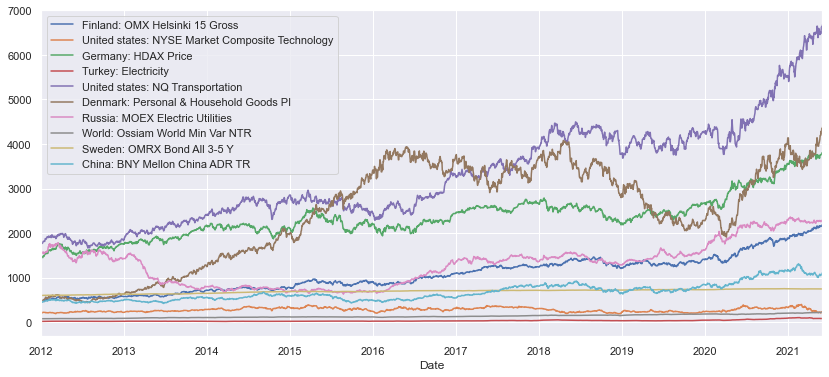

In [3]:
df.sample(10, axis=1).plot(figsize=(14, 6))

# Часть 1 Модель Марковица
Если я верно понял, то в рамках задачи предлагается определить долгосрочный инвестиционный портфель, который будет состоять из набора представленных индексов(им соответствуют торгуемые на бирже фонды). Другими словами, в своем решении я буду предлагать коэффициенты, которые соответствуют той доле капитала, которую я собираюсь вложить в тот или иной актив.

Проверим наш набор данных на пропуски

In [ ]:
print(df.isnull().sum())


Далее рассмотрим изменения в процентах каждого актива по сравнению с предыдущим моментом времени.

In [5]:
share_change=df.pct_change()*100
share_change.drop(share_change.head(1).index, inplace=True)

In [6]:
share_change

,Argentina: BNY Mellon Argentina ADR,Argentina: BNY Mellon Argentina ADR TR,Argentina: S&P Merval,Argentina: S&P/BYMA Argentina General,Australia: ASX All Ordinaries,Australia: ASX All Ordinaries Gold,Australia: ASX Small Ordinaries,Australia: BNY Mellon Australia ADR,Australia: BNY Mellon Australia ADR TR,Australia: FTSE Australia,...,World: TR/CC CRB Soybeans,World: TR/CC CRB Sugar,World: TR/CC CRB TR,World: TR/CC CRB Unleaded Gas,World: TR/CC CRB Wheat,World: TR/CC CRB ex Energy ER,World: TR/CC CRB ex Energy TR,World: WTI Futures Long USD,World: World Water CW,World: World Water TR CW
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,3.338085,3.339327,4.286880,3.165004,0.154744,1.206318,0.737896,0.000000,0.000000,1.073813,...,1.638002,5.192359,0.000000,3.431094,0.653401,0.000000,0.000000,4.178913,0.576029,0.576101
2012-01-04,3.655593,3.658132,5.733977,3.560218,2.029014,1.492460,1.529182,0.333230,0.332207,2.187305,...,0.201450,-0.370844,0.133937,1.378133,-1.062260,-0.427794,-0.421392,0.252841,1.654291,1.653664
2012-01-05,-0.011090,-0.007993,-0.009943,-0.246114,-1.012140,-0.722641,-0.591921,-1.583738,-1.583890,-1.092085,...,-1.708886,0.000000,-1.675159,-1.714286,-3.191172,0.000000,0.000000,-1.366181,-0.031430,-0.031382
2012-01-06,1.330967,1.326991,2.009436,0.955071,-0.766569,0.734775,-0.666564,-1.549855,-1.548390,-0.862704,...,-1.032931,0.691104,0.304463,0.575275,-0.708564,0.224621,0.230850,-0.245824,0.008733,0.008771
2012-01-09,0.602014,0.599582,0.388483,-0.144703,-0.070117,1.167191,-0.358864,0.301520,0.299760,-0.068310,...,3.053632,0.215329,0.661974,0.170378,2.699348,1.294901,1.291178,-0.245440,-0.200265,-0.199872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-26,2.321291,2.325356,0.670700,0.659789,-0.238124,2.032754,0.203277,1.062754,1.064023,-0.358399,...,-0.545877,-1.525501,0.492702,1.332815,-1.219841,0.404571,0.404600,0.213100,0.605470,0.618648
2021-05-27,1.111779,1.107850,1.591090,1.562241,0.169131,-1.384605,0.501014,1.294471,1.293021,-0.013509,...,2.227932,2.026412,1.147086,0.186116,4.283919,0.000000,0.000000,0.966238,-0.019744,0.094138
2021-05-28,4.160475,4.167447,2.979992,2.906090,1.089325,-0.184988,0.724837,-0.053600,-0.051910,1.229522,...,-0.422515,1.401415,-0.036583,-0.849373,-1.886298,0.298860,0.297150,-0.794413,0.637966,0.642493


<AxesSubplot:xlabel='Date'>

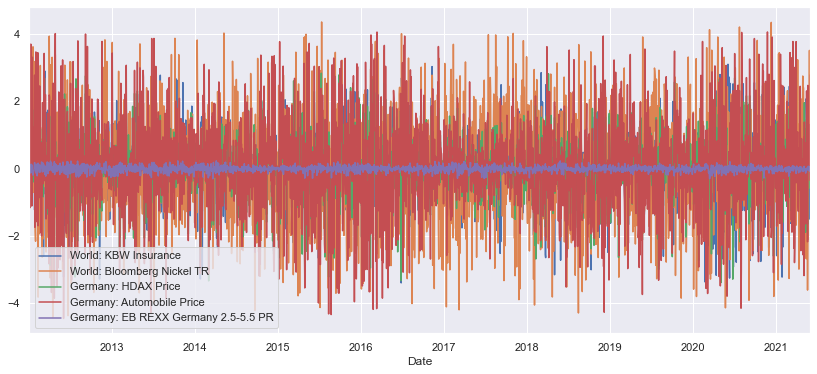

In [7]:
share_change.sample(5, axis=1).plot(figsize=(14, 6))

Видно, что некоторые активы имеют гораздо большую волатильность чем другие.Это достаточно важно и будет использоваться при анализе в дальнейшем. Кроме того, в результате внимательного изучения данных было обнаружено, что есть несколько совершенно идентичных столбцов с данными. Например, ...Energy и ...EnergyIndustry. Необходимо убрать повторы, что делается ниже. Таких столбцов оказалось 4.

In [ ]:
df_clean=df
df_clean=df_clean.T.drop_duplicates().T

В своей работе я буду использовать библиотеку PyPortfolioOpt, которая создана специально для оптимизации портфелей. В основном она базируется на идеях Марковица по выбору оптимального портфеля на эффективной границе. Т.е. можно подбирать порфтели как с фиксированным ожидаемым доходом и минимизировать риск, так и наоборот сначала минимизировать риск, а потом подбирать портфель с максимальным доходом. Ссылку прилагаю.

https://pyportfolioopt.readthedocs.io/en/latest/_modules/pypfopt/expected_returns.html

In [8]:

!pip install PyPortfolioOpt


In [9]:
!pip3 install --upgrade numpy --user



Начнем с того, что оценим ожидаемый доход несколькими способами. Первый способ- средняя историческая доходность. По сути это отношение последней цены к первой, возведенное в степень отношения частоты данных к общему количеству измерений без единицы. За частоту данных по умолчанию берется 252 дня-количество торговых дней в году. Наши данные имеют 261 измерение в год, поэтому я изменнил данный параметр.

In [165]:
from pypfopt import expected_returns
mu= expected_returns.mean_historical_return(df_clean,frequency=261)
print(mu)

Argentina: BNY Mellon Argentina ADR       0.006911
Argentina: BNY Mellon Argentina ADR TR    0.019273
Argentina: S&P Merval                     0.520605
Argentina: S&P/BYMA Argentina General     0.462169
Australia: ASX All Ordinaries             0.090929
                                            ...   
World: TR/CC CRB ex Energy ER            -0.006861
World: TR/CC CRB ex Energy TR            -0.000527
World: WTI Futures Long USD              -0.095134
World: World Water CW                     0.155129
World: World Water TR CW                  0.177214
Length: 1080, dtype: float64


Второй способ - это вычисление экспоненциально взвешенных средних значение исторической доходности и придание большего веса более свежим данным. Уровень памяти определяется параметром span. По умолчанию он равен 500. Так как мы планируем строить долгосрочный портфель стоит учитывать исторические данные на большую глубину. Увеличение параметра до 2000 позволило учитывать данные двухлетней давности с коэффициентом в 2 раза меньшим, чем у всежих данных. А не примерно в 10 раз меньше, как раньше. 

In [166]:
mu1= expected_returns.ema_historical_return(df_clean,frequency=261,span=2000)
print(mu1)

Argentina: BNY Mellon Argentina ADR      -0.002928
Argentina: BNY Mellon Argentina ADR TR    0.012162
Argentina: S&P Merval                     0.543012
Argentina: S&P/BYMA Argentina General     0.513269
Australia: ASX All Ordinaries             0.125421
                                            ...   
World: TR/CC CRB ex Energy ER             0.066057
World: TR/CC CRB ex Energy TR             0.072123
World: WTI Futures Long USD               0.141985
World: World Water CW                     0.170398
World: World Water TR CW                  0.190808
Name: 2021-06-01 00:00:00, Length: 1080, dtype: float64


В целом отмечу, что определение возможных доходностей довольно слабое место в данной модели. Как минимум мы ориентируемся только на исторические данные и никак не среагируем в случае потрясений рынка. но данная проблема присуща многим теоретическим подходам. На мой взгляд, для построения хорошей модели, которая должна реально работать на практике необходимо определять доходности гораздо более сложными способами, например, привлекать коэффициенты экспертных оценок.

Следующая часть это построение матрицы рисков, в нашем случае матрицы ковариаций. Опять в самой библиотеке существует возможность выбрать несколько вариантов построения. Я выбрал выборочную ковариационную матрицу(Sigma) и ковариационную матрицу с усадкой Ледуа-Вольфа(cov)(аналог регуляризации l2 в машинном обучении для приближения эмпирической ковариационной матрицы к реальной.
Подробнее:О. Ледойт и М. Вольф, «Хорошо обусловленная оценка для многомерных ковариационных матриц», Журнал многомерного анализа, том 88, выпуск 2, февраль 2004 г., страницы 365-411.

In [167]:
from pypfopt import risk_models 

Sigma = risk_models.sample_cov(df_clean,frequency=261)
cov = risk_models.CovarianceShrinkage(df_clean,frequency=261).ledoit_wolf()


In [169]:
cov

,Argentina: BNY Mellon Argentina ADR,Argentina: BNY Mellon Argentina ADR TR,Argentina: S&P Merval,Argentina: S&P/BYMA Argentina General,Australia: ASX All Ordinaries,Australia: ASX All Ordinaries Gold,Australia: ASX Small Ordinaries,Australia: BNY Mellon Australia ADR,Australia: BNY Mellon Australia ADR TR,Australia: FTSE Australia,...,World: TR/CC CRB Soybeans,World: TR/CC CRB Sugar,World: TR/CC CRB TR,World: TR/CC CRB Unleaded Gas,World: TR/CC CRB Wheat,World: TR/CC CRB ex Energy ER,World: TR/CC CRB ex Energy TR,World: WTI Futures Long USD,World: World Water CW,World: World Water TR CW
Argentina: BNY Mellon Argentina ADR,0.108321,0.108109,0.065583,0.055130,0.002516,0.000898,0.002365,0.023732,0.023652,0.002666,...,0.006058,0.008324,0.008944,0.018323,0.006352,0.005488,0.005374,0.018962,0.009280,0.009555
Argentina: BNY Mellon Argentina ADR TR,0.108109,0.109747,0.066020,0.055553,0.002585,0.001487,0.002434,0.023605,0.023646,0.002705,...,0.005954,0.008378,0.008849,0.018218,0.006481,0.005530,0.005416,0.018499,0.009279,0.009556
Argentina: S&P Merval,0.065583,0.066020,0.094040,0.078390,0.002673,0.001839,0.002340,0.020188,0.020227,0.002634,...,0.004188,0.010279,0.009572,0.017820,0.005789,0.005213,0.005090,0.020652,0.007963,0.008183
Argentina: S&P/BYMA Argentina General,0.055130,0.055553,0.078390,0.073549,0.002727,0.002233,0.002387,0.018580,0.018670,0.002686,...,0.003772,0.009221,0.008802,0.016039,0.005481,0.004781,0.004671,0.018654,0.007164,0.007374
Australia: ASX All Ordinaries,0.002516,0.002585,0.002673,0.002727,0.013831,0.006425,0.012128,0.007435,0.007333,0.013936,...,0.001093,0.001943,0.000943,0.002436,-0.000492,0.000905,0.000889,0.001451,0.002782,0.002837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
World: TR/CC CRB ex Energy ER,0.005488,0.005530,0.005213,0.004781,0.000905,0.002209,0.001206,0.006799,0.006811,0.000990,...,0.008561,0.009656,0.007070,0.005549,0.008911,0.008327,0.008093,0.007790,0.001021,0.001002
World: TR/CC CRB ex Energy TR,0.005374,0.005416,0.005090,0.004671,0.000889,0.002156,0.001191,0.006783,0.006795,0.000971,...,0.008580,0.009649,0.007061,0.005518,0.008914,0.008093,0.008323,0.007737,0.000968,0.000949
World: WTI Futures Long USD,0.018962,0.018499,0.020652,0.018654,0.001451,0.000365,0.002331,0.021927,0.021604,0.001436,...,0.008646,0.011774,0.031999,0.061226,0.008015,0.007790,0.007737,0.091449,0.005936,0.005955
World: World Water CW,0.009280,0.009279,0.007963,0.007164,0.002782,-0.000364,0.002579,0.009261,0.009369,0.002775,...,0.001623,0.001647,0.002352,0.004853,-0.000613,0.001021,0.000968,0.005936,0.013994,0.013746


In [170]:
Sigma

,Argentina: BNY Mellon Argentina ADR,Argentina: BNY Mellon Argentina ADR TR,Argentina: S&P Merval,Argentina: S&P/BYMA Argentina General,Australia: ASX All Ordinaries,Australia: ASX All Ordinaries Gold,Australia: ASX Small Ordinaries,Australia: BNY Mellon Australia ADR,Australia: BNY Mellon Australia ADR TR,Australia: FTSE Australia,...,World: TR/CC CRB Soybeans,World: TR/CC CRB Sugar,World: TR/CC CRB TR,World: TR/CC CRB Unleaded Gas,World: TR/CC CRB Wheat,World: TR/CC CRB ex Energy ER,World: TR/CC CRB ex Energy TR,World: WTI Futures Long USD,World: World Water CW,World: World Water TR CW
Argentina: BNY Mellon Argentina ADR,0.105159,0.105153,0.063790,0.053622,0.002447,0.000873,0.002300,0.023083,0.023005,0.002593,...,0.005893,0.008097,0.008700,0.017822,0.006179,0.005338,0.005227,0.018443,0.009026,0.009293
Argentina: BNY Mellon Argentina ADR TR,0.105153,0.106546,0.064215,0.054034,0.002514,0.001447,0.002367,0.022959,0.022999,0.002631,...,0.005792,0.008149,0.008607,0.017720,0.006304,0.005379,0.005268,0.017994,0.009025,0.009294
Argentina: S&P Merval,0.063790,0.064215,0.091269,0.076247,0.002599,0.001789,0.002276,0.019636,0.019674,0.002562,...,0.004073,0.009998,0.009310,0.017333,0.005630,0.005070,0.004951,0.020087,0.007745,0.007960
Argentina: S&P/BYMA Argentina General,0.053622,0.054034,0.076247,0.071337,0.002652,0.002172,0.002322,0.018072,0.018159,0.002613,...,0.003668,0.008969,0.008561,0.015600,0.005331,0.004650,0.004543,0.018144,0.006968,0.007172
Australia: ASX All Ordinaries,0.002447,0.002514,0.002599,0.002652,0.013253,0.006250,0.011796,0.007231,0.007133,0.013555,...,0.001063,0.001890,0.000917,0.002370,-0.000479,0.000880,0.000864,0.001411,0.002706,0.002759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
World: TR/CC CRB ex Energy ER,0.005338,0.005379,0.005070,0.004650,0.000880,0.002148,0.001173,0.006613,0.006625,0.000963,...,0.008326,0.009392,0.006877,0.005397,0.008668,0.007899,0.007872,0.007577,0.000993,0.000975
World: TR/CC CRB ex Energy TR,0.005227,0.005268,0.004951,0.004543,0.000864,0.002097,0.001159,0.006597,0.006610,0.000945,...,0.008346,0.009386,0.006868,0.005367,0.008671,0.007872,0.007895,0.007525,0.000941,0.000923
World: WTI Futures Long USD,0.018443,0.017994,0.020087,0.018144,0.001411,0.000355,0.002267,0.021328,0.021013,0.001396,...,0.008409,0.011452,0.031124,0.059552,0.007795,0.007577,0.007525,0.088748,0.005774,0.005792
World: World Water CW,0.009026,0.009025,0.007745,0.006968,0.002706,-0.000354,0.002509,0.009008,0.009113,0.002699,...,0.001578,0.001602,0.002288,0.004721,-0.000596,0.000993,0.000941,0.005774,0.013411,0.013370


Далее необходимо было использовать стандартную функцию для выбора оптимального портфеля по Марковицу. Я хотел найти портфель оптимальный с точки максимизации коэффициента Шарпа. Однако, все оптимизаторы отказались сходиться. Я предположил, что это может быть связано с сингулярностью матрицы ковариации.

In [171]:
np.linalg.det(Sigma)

0.0

In [172]:
np.linalg.det(cov)

0.0

Обе матрицы имеют нулево определитель и использование стандартных оптимизаторов для решения задачи квадратичного программирования невозможно. Далее я предпринял несколько логичных, на мой взгляд, шагов для решения данной задачи. 
Первая идея - попробовать наложить матрицу-маску(a_symm) на матрицу ковариаций. Это матрица(обязательно симметричная) с псевдослучайными значениями.Конечно, это ухудшает точность, но я все равно рассмотрел данное решение как возможный вариант. Реализация не дала хороших результатов - определитель остается близким к нулю при всех значениях в маске ниже единицы. При значениях больше единицы он уходит в бесконечность.

In [290]:
a = np.random.randint(100, size=(cov.shape[0],cov.shape[1]))
a_symm = (a + a.T)/2
a_symm=pd.DataFrame(a_symm)/10000


In [291]:
a_symm

,0,1,2,3,4,5,6,7,8,9,...,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079
0,0.00070,0.00680,0.00880,0.00480,0.00500,0.00445,0.00460,0.00450,0.00560,0.00205,...,0.00255,0.00450,0.00360,0.00790,0.00505,0.00125,0.00185,0.00600,0.00405,0.00615
1,0.00680,0.00820,0.00380,0.00710,0.00855,0.00685,0.00900,0.00520,0.00805,0.00525,...,0.00700,0.00590,0.00655,0.00220,0.00635,0.00685,0.00605,0.00785,0.00600,0.00550
2,0.00880,0.00380,0.00820,0.00470,0.00145,0.00675,0.00580,0.00660,0.00290,0.00230,...,0.00620,0.00250,0.00430,0.00720,0.00225,0.00330,0.00505,0.00530,0.00270,0.00560
3,0.00480,0.00710,0.00470,0.00100,0.00630,0.00295,0.00405,0.00505,0.00100,0.00355,...,0.00535,0.00550,0.00525,0.00475,0.00250,0.00450,0.00850,0.00355,0.00720,0.00285
4,0.00500,0.00855,0.00145,0.00630,0.00120,0.00600,0.00490,0.00335,0.00350,0.00300,...,0.00195,0.00385,0.00510,0.00400,0.00370,0.00345,0.00185,0.00670,0.00540,0.00185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.00125,0.00685,0.00330,0.00450,0.00345,0.00450,0.00800,0.00350,0.00275,0.00445,...,0.00625,0.00280,0.00765,0.00300,0.00315,0.00000,0.00280,0.00880,0.00340,0.00580
1076,0.00185,0.00605,0.00505,0.00850,0.00185,0.00410,0.00265,0.00735,0.00280,0.00380,...,0.00280,0.00710,0.00680,0.00295,0.00435,0.00280,0.00440,0.00665,0.00240,0.00885
1077,0.00600,0.00785,0.00530,0.00355,0.00670,0.00440,0.00525,0.00540,0.00505,0.00405,...,0.00505,0.00460,0.00795,0.00490,0.00275,0.00880,0.00665,0.00670,0.00050,0.00220
1078,0.00405,0.00600,0.00270,0.00720,0.00540,0.00400,0.00570,0.00530,0.00335,0.00365,...,0.00810,0.00235,0.00475,0.00530,0.00330,0.00340,0.00240,0.00050,0.00900,0.00605


In [293]:
res= cov + a_symm.to_numpy()
print(np.linalg.det(res))

Вторая идея - просто убрать все линейно зависимые переменные. Мы теряем данные, но по идее должны избавиться от сингулярности. Для начала выясним ранг матрицы-т.е. количество линейно независимых переменных. Если их будет совсем мало, то откажемся от данной затеи.

In [373]:
np.linalg.matrix_rank(cov, hermitian=True)


976

Линейно независимых векторов довольно много.Найдем их следующим образом: возьмем матрицу корреляции от матрицы корреляции. Уберем единицы на диагонали(корреляция вектора с самим собой, возьмем модуль, чтобы избавитсья от знака и затем используем isclose, чтобы найти все значения близкие к единице, но не обязательно ей равные. В итоге получим номера линейно зависимых столбцов.

In [ ]:
print(np.nonzero(np.isclose(np.abs(np.corrcoef(cov) - np.eye(cov.shape[0])), 1.)))

Далее создадим новую переменную df_proverka(не очень удачное название, но не стал менять) и уберем все эти переменные, а зате снова посчитает определитель. К сожалению, этот подход не помог и определитель снова равен нулю.Это достаточно интересный результат и мне он пока не понятен.

In [380]:


df_proverka=df.T.drop_duplicates().T
df_proverka=df_proverka.drop(df_proverka.columns[[16,   25,   48,   58,   94,   96,   97,   98,   98,   99,  127,
        128,  153,  174,  190,  191,  215,  223,  266,  274,  275,  288,
        288,  290,  290,  291,  291,  360,  361,  368,  372,  373,  374,
        375,  376,  377,  502,  507,  508,  512,  598,  601,  662,  668,
        749,  750,  756,  757,  758,  765,  766,  779,  781,  782,  796,
        797,  799,  799,  800,  800,  801,  801,  811,  822,  880,  882,
        906,  907,  908,  911,  911,  912,  912,  914,  918,  920,  921,
        922,  923,  924,  927,  929,  930,  933,  934,  935,  941,  942,
        951,  952,  953,  955,  957,  958,  959,  960,  961,  963,  964,
        965,  966,  967,  968,  969,  971,  972,  974,  975,  976,  977,
        987,  987, 1054, 1072]],axis = 1)
cov = risk_models.CovarianceShrinkage(df_proverka,frequency=261).ledoit_wolf()
muuu= expected_returns.ema_historical_return(df_proverka,frequency=261,span=2000)
print(np.linalg.det(cov))

(array([], dtype=int64), array([], dtype=int64))
0.0


In [439]:
Sigma = risk_models.sample_cov(df_proverka)
mu= expected_returns.mean_historical_return(df_proverka,frequency=261)


Однако, после проведения данной операции ошибка сменилась и теперь при поиске портфеля с максимальным коэффициентом Шарпа алгоритм жаловался на невыпуклость функции. Оставив идею искать именно данный портфель, найдем портфель с минимальной волатильностью. Отметим, что ищется портфель без возможности открытия коротких позиций(не можем брать активы в долг). Если мы хотим включить короткие позиции, то надо поменять weight_bounds на (-1,1). Функция clean_weights() в данном случае обнуляет совсем маленькие веса.

In [464]:

from pypfopt.efficient_frontier import EfficientFrontier 
#Портфель минимальной волатильности
ef = EfficientFrontier(mu, cov, weight_bounds=(0,1)) 
minvol_pfolio=ef.min_volatility() 
minvol_pwt=ef.clean_weights()
print(minvol_pwt)


OrderedDict([('Argentina: BNY Mellon Argentina ADR', 0.0), ('Argentina: BNY Mellon Argentina ADR TR', 0.0), ('Argentina: S&P Merval', 0.0), ('Argentina: S&P/BYMA Argentina General', 0.0), ('Australia: ASX All Ordinaries', 0.0), ('Australia: ASX All Ordinaries Gold', 0.0), ('Australia: ASX Small Ordinaries', 0.0), ('Australia: BNY Mellon Australia ADR', 0.0), ('Australia: BNY Mellon Australia ADR TR', 0.0), ('Australia: FTSE Australia', 0.0), ('Australia: S&P/ASX 100', 0.0), ('Australia: S&P/ASX 100 Industrials', 0.0), ('Australia: S&P/ASX 100 Resources', 0.0), ('Australia: S&P/ASX 20', 0.0), ('Australia: S&P/ASX 200', 0.0), ('Australia: S&P/ASX 200 Accumulated', 0.0), ('Australia: S&P/ASX 200 Captal Goods Size', 0.0), ('Australia: S&P/ASX 200 Commercial & Professional Services', 0.0), ('Australia: S&P/ASX 200 Consumer Discretionary', 0.0), ('Australia: S&P/ASX 200 Consumer Durables & Apparel', 0.0), ('Australia: S&P/ASX 200 Consumer Staples', 0.0), ('Australia: S&P/ASX 200 Diversified 

Далее попробуем посмотреть как зависит коэффициент Шарпа для портфелей с фиксированным уровне доходности. В результате анализа получено, что максимальный коэффициент Шарпа достигается при ожидаемой доходности 16%(при шаге в 1% по доходности). Выше 52% доходность достигнута в данном случае быть не может. Кроме того, отметим, что risk_free_rate отвечает за безрисковую ставку. 

In [498]:
ef = EfficientFrontier(mu, cov, weight_bounds=(0,1)) 
List=[]
for i in range(0,60,1):
    effr=ef.efficient_return(target_return= i/100) 
    effr_pwt=ef.clean_weights()
    P=ef.portfolio_performance(verbose=True, risk_free_rate = 0.04)
    List.append(P[2])


Expected annual return: 0.5%
Annual volatility: 0.3%
Sharpe Ratio: -10.62
Expected annual return: 1.0%
Annual volatility: 0.3%
Sharpe Ratio: -9.04
Expected annual return: 2.0%
Annual volatility: 0.4%
Sharpe Ratio: -5.05
Expected annual return: 3.0%
Annual volatility: 0.5%
Sharpe Ratio: -1.97
Expected annual return: 4.0%
Annual volatility: 0.6%
Sharpe Ratio: 0.00
Expected annual return: 5.0%
Annual volatility: 0.8%
Sharpe Ratio: 1.26
Expected annual return: 6.0%
Annual volatility: 0.9%
Sharpe Ratio: 2.11
Expected annual return: 7.0%
Annual volatility: 1.1%
Sharpe Ratio: 2.72
Expected annual return: 8.0%
Annual volatility: 1.3%
Sharpe Ratio: 3.16
Expected annual return: 9.0%
Annual volatility: 1.4%
Sharpe Ratio: 3.46
Expected annual return: 10.0%
Annual volatility: 1.6%
Sharpe Ratio: 3.71
Expected annual return: 11.0%
Annual volatility: 1.8%
Sharpe Ratio: 3.88
Expected annual return: 12.0%
Annual volatility: 2.0%
Sharpe Ratio: 4.00
Expected annual return: 13.0%
Annual volatility: 2.2%
Sh

D:\Anaconda\envs\forTF\lib\site-packages\cvxpy\problems\problem.py:1279: UserWarning:

Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.



Expected annual return: 48.0%
Annual volatility: 24.5%
Sharpe Ratio: 1.80
Expected annual return: 49.0%
Annual volatility: 25.7%
Sharpe Ratio: 1.75
Expected annual return: 50.0%
Annual volatility: 26.2%
Sharpe Ratio: 1.76
Expected annual return: 51.0%
Annual volatility: 28.3%
Sharpe Ratio: 1.66
Expected annual return: 52.0%
Annual volatility: 29.2%
Sharpe Ratio: 1.64


ValueError: target_return must be lower than the maximum possible return

In [502]:
import plotly
import plotly.express as px
fig = px.scatter(x= [i/100 for i in range(53)]
, y=List)
fig.update_xaxes(title_text='Expected annual return')
fig.update_yaxes(title_text='Sharpe Ratio')
fig.show()

Визуализируем эффективную границу. Она построена для ковариации  Ледуа-Вольфа и ожидаемых доходов в виде средней исторической доходности

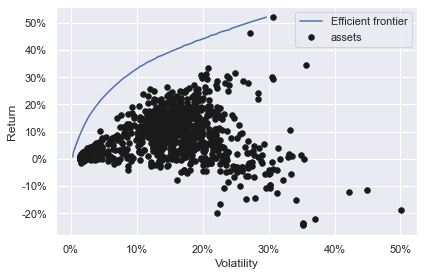

In [503]:
import pypfopt.plotting as pplt
from matplotlib.ticker import FuncFormatter

Ef_obj = EfficientFrontier(mu, cov)
ax = pplt.plot_efficient_frontier(Ef_obj, showfig = False)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# Вывод
Выше была показана оптимизация портфеля по Морковицу. Отметим, что начальные данные плохо подходят для формирвоания портфеля.Некоторые активы по сути повторяют друг друга, например, 200 крупнейших компаний Австралии в сфере еды и 300 крупнейших компаний. На мой згляд, оптимально было бы выбрать портфель из небольшого количества бумаг(до 50) из экономических соображений(диверсифицировать по отраслям) и затем проводить решение для такого набора. Однако, так как задача носит чисто теоретический характер, все этапы показаны на общем наборе данных. При этом, возникли некоторые проблемы с оптимизаторами, которые были освещены.Однако, возникает вопрос, что делать, если даже для небольшого набора возникает проблема с оптимизацией решения. Существуют другие методы, которые не требуют обращения матрицы ковариаций и они реализованы ниже.

# Часть 2 Методы кластеризации
В книге, которая была отправлена вмесет с заданием, я прочитал о методах кластеризации активов, которую придумал в 2016 году Лопес де Прадо. Его алгоритм называется  Hierarchical Risk Parity (HRP). Кроме того, я познакомился с более поздней работой на эту тему от  Томаса Раффино. Он придумал другой алгоритм, который похож на предыдущий и называется Hierarchical Clustering based Asset Allocation (HCAA).Попробуем применить оба из них и провести сравнение.Алгоритм HCAA реализован в библиотеке portfoliolab и называется HierarchicalEqualRiskContribution.

In [520]:
!pip install portfoliolab --user
import matplotlib.patches as mpatches

from portfoliolab.clustering import HierarchicalEqualRiskContribution

  Using cached portfoliolab-0.1.0-py3-none-any.whl (102 kB)
  Using cached analytics_python-1.2.9-py2.py3-none-any.whl (13 kB)
  Using cached pandas-1.0.4-cp37-cp37m-win_amd64.whl (8.7 MB)
  Using cached scikit_learn-0.23.1-cp37-cp37m-win_amd64.whl (6.8 MB)
  Using cached matplotlib-3.2.1-cp37-cp37m-win_amd64.whl (9.2 MB)
  Using cached numpy-1.18.5-cp37-cp37m-win_amd64.whl (12.7 MB)
  Using cached getmac-0.8.2-py2.py3-none-any.whl (24 kB)
  Using cached cvxpy-1.1.1-cp37-cp37m-win_amd64.whl (763 kB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mkl-random 1.0.1 requires cython, which is not installed.
fastai 1.0.34 requires torchvision-nightly, which is not installed.
fastai 1.0.34 requires typing, which is not installed.
tensorflow 2.4.1 requires numpy~=1.19.2, but you have numpy 1.18.5 which is incompatible.
thinc 6.12.0 requires wrapt<1.11.0,>=1.10.0, but you have wrapt 1.12.1 which is incompatible.
spacy 2.0.16 requires regex==2018.01.10, but you have regex 2018.8.29 which is incompatible.
pyportfolioopt 1.4.2 requires cvxpy<2.0.0,>=1.1.10, but you have cvxpy 1.1.1 which is incompatible.
ktrain 0.26.1 requires scikit-learn

Два самых главных параметра при построении решения на онове алгоритма HCAA мера риска и мера связи активов друг с другом. В качестве выбора меры связи я выбрал связь Уорда(расстояние между двумя кластерами - это увеличение квадрата ошибки по сравнению с объединением двух кластеров). Среди других вариантов - расстояние между двумя кластерами, это минимальное/среднее/максимальное расстояние между любыми двумя точками в кластерах. 
Риск определим так:все кластеры имеют одинаковый вес по отношению к риску. Другие варианты - дисперсия/стандартное отклонение кластеров используется в качестве показателя риска и др. 

In [521]:
herc = HierarchicalEqualRiskContribution()
herc.allocate(asset_names=df.columns, 
              asset_prices=df, 
              risk_measure="equal_weighting", 
              linkage="ward")
herc_weights = herc.weights


NameError: name 'plt' is not defined

In [529]:
from plotly.offline import iplot
import cufflinks
cufflinks.go_offline()


В результате получены веса, которые выведены на графике. Мы видим, что все активы получили в данном подходе ненулевые веса, однако они все очень маленькие(оно и понятно, активов очень много). Алгоритм делит активы на огромное колчиество частей(показано ниже), однако, оптимальное количество класстеров равно 4. Т.е. все активы в каждом кластере имеют одинаковый вес. Делается это для того, чтобы избежать переобучения. А момент остановки определяется по индексу разрыва.Подробнее:https://statweb.stanford.edu/~gwalther/gap

In [535]:
herc_weights.T[0].iplot(kind='hist', xTitle='Assets',
                  yTitle='Asset Weights', title='HERC Portfolio Weights')

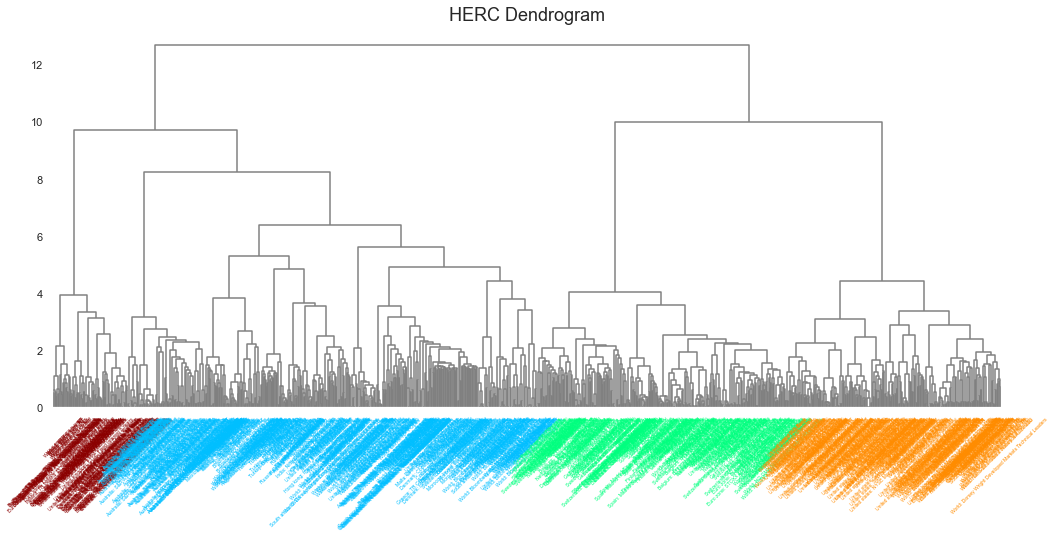

In [536]:
import matplotlib.pyplot as plt
plt.figure(figsize=(17,7))
herc.plot_clusters(assets=df.columns)
plt.title('HERC Dendrogram', size=18)
plt.xticks(rotation=45)
plt.show()

In [541]:
print("Оптимальное количество кластеров: " + str(herc.optimal_num_clusters))


Оптимальное количество кластеров: 4


Понятно, что для такого большого количества активов трудно сделать какое-то внятное сравнение. Однако, я специально показал, что он работает и нет никаких проблем с поиском оптимума как было показано выше. Далее выберем 10 активов случайным образом и проведем некоторый анализ на них. Число 10 выбрано по тому принципу, что это минимальное количество ценных бумаг для портфеля по мнению Берзона в курсе по финансовым рынкам от ВШЭ.

In [552]:
num_of_assets = np.random.randint(1000, size=(10))


In [557]:
partial_df=df.iloc[:,num_of_assets]


In [580]:
herc_10 = HierarchicalEqualRiskContribution()
herc_10.allocate(asset_names=partial_df.columns, 
              asset_prices=partial_df, 
              risk_measure="equal_weighting", 
              linkage="ward")
herc_10_weights = herc_10.weights


In [584]:
herc_10_weights.T[0].iplot(kind='hist', xTitle='Assets',
                  yTitle='Asset Weights', title='HERC Portfolio Weights')

In [641]:
herc_10_weights

,Finland: OMX Helsinki 25,Belgium: FTSE Belgium EUR,Brazil: BNY Mellon Brazil ADR TR,Germany: BNY Mellon Germany ADR TR,United states: TR US 50,Australia: S&P/ASX Small Ordinaries Resources,New zealand: NZX All,Australia: S&P/ASX 200 Hotels Restaurants & Leisure,World: Bloomberg Coffee Euro Hedged TR,Euro zone: TR Eurozone 2 Years Government Benchmark
0,0.1,0.1,0.1,0.1,0.1,0.083333,0.083333,0.083333,0.125,0.125


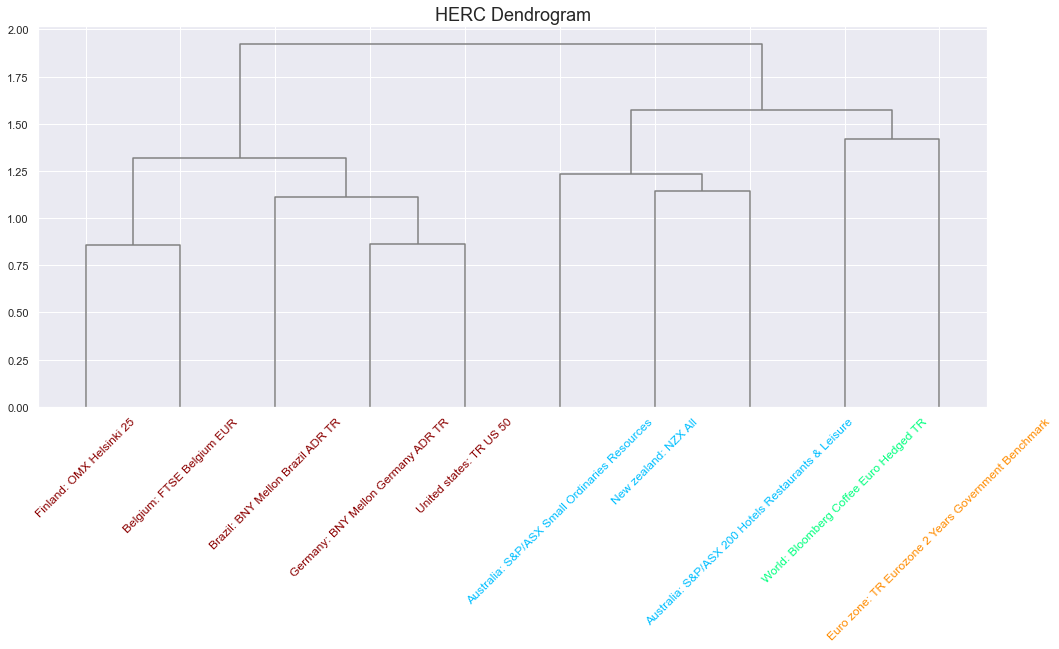

In [587]:
plt.figure(figsize=(17,7))
herc_10.plot_clusters(assets=partial_df.columns)
plt.title('HERC Dendrogram', size=18)
plt.xticks(rotation=45)
plt.show()

Проведя аналогичный расчет мы видим, что активы также были разделены на 4 кластера. Если посмотреть на волатильность их процентного приращения станет понятно, что, например, Euro zone:TR 2 Years Government Benchmark имеет очень низкую волатильность. Здесь этот актив как раз выведен отдельно.
Несмотря на сходство с традиционными портфелями равных весов, основное отличие схемы равных весов HERC заключается в том, что за это распределение конкурируют только активы в кластере. Вместо того, чтобы все  активы получили равные веса, веса распределяются неравномерно между кластерами, а затем делятся поровну внутри них. Это гарантирует, что портфель остается хорошо диверсифицированным за счет присвоения весов всем активам и в то же время гарантирует, что только элементы в кластере конкурируют за эти распределения.

In [596]:
share_change_10=partial_df.pct_change()*100
share_change_10.drop(share_change_10.head(1).index, inplace=True)

<AxesSubplot:xlabel='Date'>

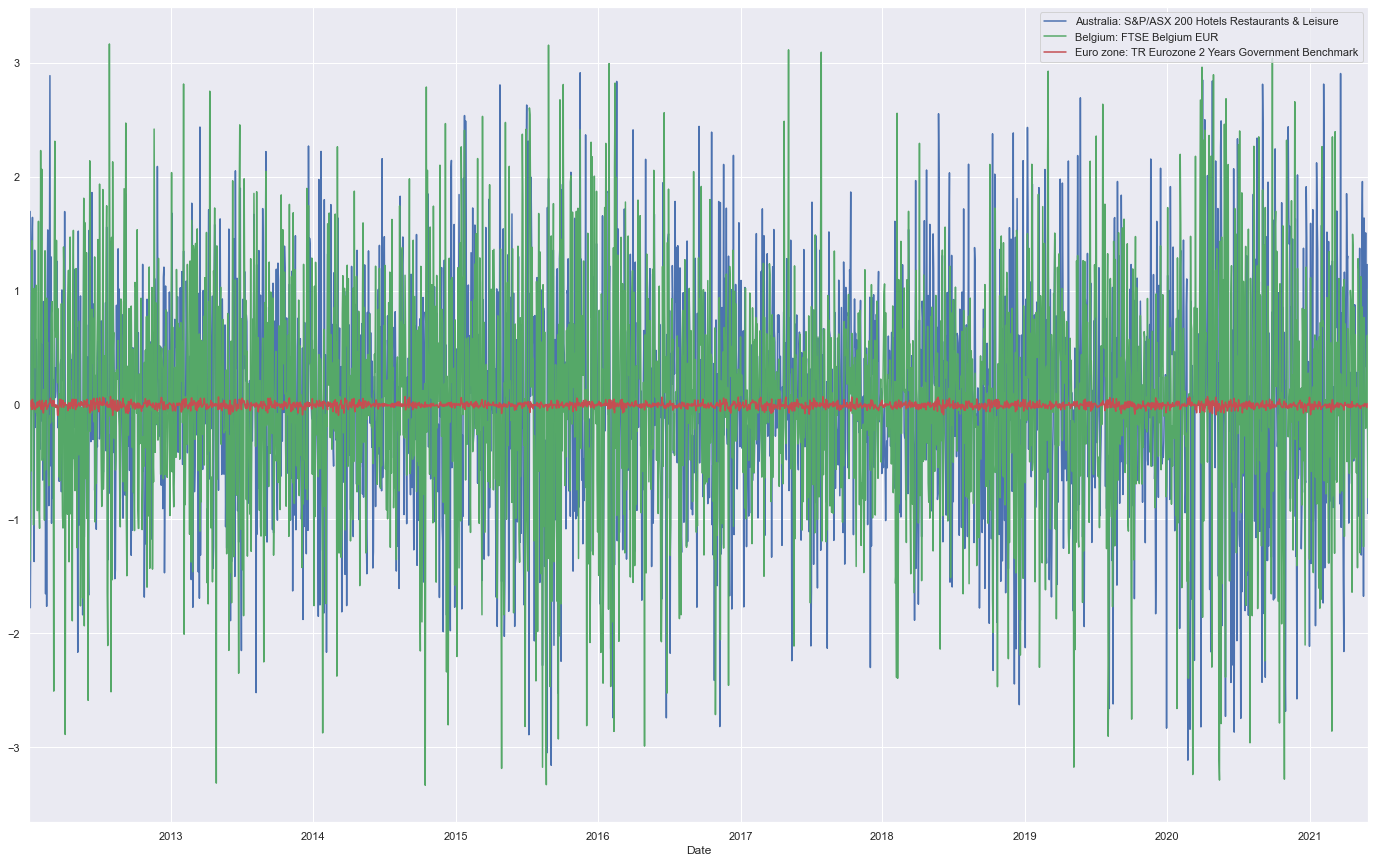

In [570]:
share_change_10.sample(3, axis=1).plot(figsize=(24, 15))

In [582]:
print("Оптимальное количество кластеров: " + str(herc_10.optimal_num_clusters))


Оптимальное количество кластеров: 4


Далее выполним HRP на этом же наборе из 10 активов и сравним. 

D:\Anaconda\envs\forTF\lib\site-packages\ipykernel_launcher.py:7: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



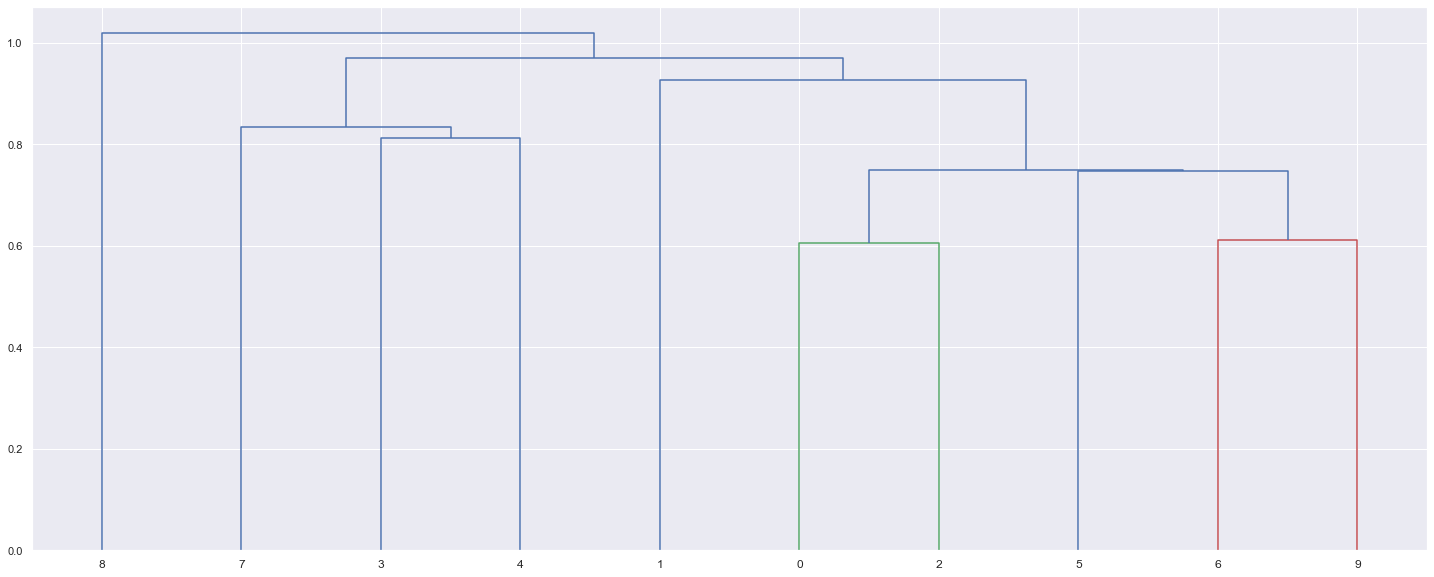

In [597]:
from scipy.cluster.hierarchy import dendrogram, linkage
# Матрица корреляций
returns=share_change_10
corr = returns.corr()
# Матрица расстояний
d_corr = np.sqrt(0.5*(1-corr))
link = linkage(d_corr, 'single')
Z = pd.DataFrame(link)

fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)


In [598]:
def get_quasi_diag(link):
    
    # сортировка элементов по расстоянию
    
    link = link.astype(int)
    
    # получить первый и второй элемент последнего кортежа
    sort_ix = pd.Series([link[-1,0], link[-1,1]]) 
    
    # общее количество элементов
    num_items = link[-1, 3]
    
    
    while sort_ix.max() >= num_items:
        
        sort_ix.index = range(0, sort_ix.shape[0]*2, 2)
        
        df0 = sort_ix[sort_ix >= num_items] # кластеры
        
        
        i = df0.index
        j = df0.values - num_items  
        
        sort_ix[i] = link[j,0] 
        
        df0  = pd.Series(link[j, 1], index=i+1)
        
        sort_ix = sort_ix.append(df0)
        sort_ix = sort_ix.sort_index()
        
        sort_ix.index = range(sort_ix.shape[0])
        
    
    return sort_ix.tolist()

In [599]:
sort_ix = get_quasi_diag(link)
sort_ix

[8, 7, 3, 4, 1, 0, 2, 5, 6, 9]

In [601]:
def get_cluster_var(cov, c_items):
    cov_ = cov.iloc[c_items, c_items] # срез матрицы
    # "наивный" подход по обратной дисперсии
    ivp = 1./np.diag(cov_)
    ivp/=ivp.sum()
    w_ = ivp.reshape(-1,1)
    c_var = np.dot(np.dot(w_.T, cov_), w_)[0,0]
    return c_var
def get_rec_bipart(cov, sort_ix):
    w = pd.Series(1, index=sort_ix)
    
    # инициализировать все элементы в одном кластере
    c_items = [sort_ix]
    while len(c_items) > 0:
        # Деление пополам
        """
        [[3, 6, 0, 9, 2, 4, 13], [5, 12, 8, 10, 7, 1, 11]]
        [[3, 6, 0], [9, 2, 4, 13], [5, 12, 8], [10, 7, 1, 11]]
        [[3], [6, 0], [9, 2], [4, 13], [5], [12, 8], [10, 7], [1, 11]]
        [[6], [0], [9], [2], [4], [13], [12], [8], [10], [7], [1], [11]]
        """
        c_items = [i[int(j):int(k)] for i in c_items for j,k in 
                   ((0,len(i)/2),(len(i)/2,len(i))) if len(i)>1]
        
        
        for i in range(0, len(c_items), 2):
            
            c_items0 = c_items[i] # кластер 1
            c_items1 = c_items[i+1] # кластер 2
            
            c_var0 = get_cluster_var(cov, c_items0)
            c_var1 = get_cluster_var(cov, c_items1)
            
            alpha = 1 - c_var0/(c_var0+c_var1)
            
            w[c_items0] *= alpha
            w[c_items1] *=1-alpha
    return w

In [689]:
cov = returns.cov()
hrp_weights = get_rec_bipart(cov, sort_ix)

In [691]:

new_index = [returns.columns[i] for i in hrp_weights.index]
hrp_weights.index = new_index

In [692]:
hrp_weights

Euro zone: TR Eurozone 2 Years Government Benchmark    0.995983
Australia: S&P/ASX Small Ordinaries Resources          0.000318
New zealand: NZX All                                   0.001876
Australia: S&P/ASX 200 Hotels Restaurants & Leisure    0.000531
World: Bloomberg Coffee Euro Hedged TR                 0.000164
Finland: OMX Helsinki 25                               0.000266
Belgium: FTSE Belgium EUR                              0.000270
Brazil: BNY Mellon Brazil ADR TR                       0.000099
Germany: BNY Mellon Germany ADR TR                     0.000157
United states: TR US 50                                0.000336
dtype: float64

Таким образом, при данном подходе максимальный вес(близкий к единице) получил актив с минимальной волатильностью. С точки зрения диверсификации этот портфель нельзя назвать удачным. Если мы поменяем параметры алгоритма HCAA на меру риcка дисперсию и меру связи на минимальное расстояние между любыми двумя точками в кластерах(именно такие параметры установлены в HRP, то веса резко поменяются и мы получим приблизительно такой же результат. Это показано ниже.

In [608]:
herc_10_var = HierarchicalEqualRiskContribution()
herc_10_var.allocate(asset_names=partial_df.columns, 
              asset_prices=partial_df, 
              risk_measure="variance", 
              linkage="single")
# plotting our optimal portfolio
herc_10_var_weights = herc_10_var.weights


In [609]:
herc_10_var_weights

,Euro zone: TR Eurozone 2 Years Government Benchmark,Australia: S&P/ASX Small Ordinaries Resources,New zealand: NZX All,Australia: S&P/ASX 200 Hotels Restaurants & Leisure,World: Bloomberg Coffee Euro Hedged TR,Brazil: BNY Mellon Brazil ADR TR,Finland: OMX Helsinki 25,Belgium: FTSE Belgium EUR,Germany: BNY Mellon Germany ADR TR,United states: TR US 50
0,0.997129,0.000136,0.001024,0.000299,0.000092,0.000084,0.000286,0.00029,0.00021,0.00045


<AxesSubplot:xlabel='Date'>

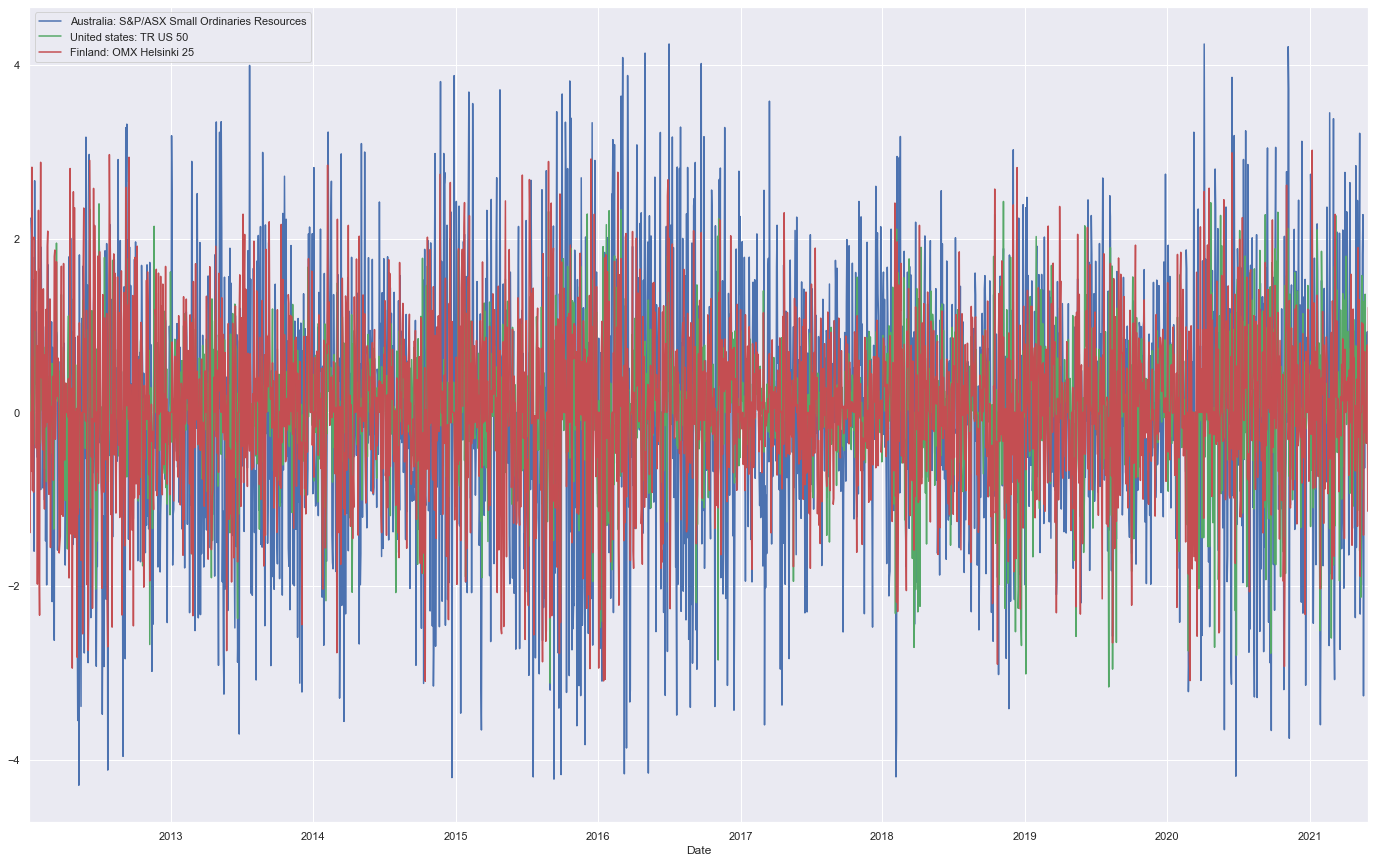

In [607]:
share_change_10.sample(3, axis=1).plot(figsize=(24, 15))

# Вывод 2

Алгоритмы HRP и HCAA это достаточно интересный аналог классического портфельного инвестирования Марковица. Они не боятся сингулярности матрицы дисперсии и достаточно наглядны.Выбор подходящего количества кластеров и добавление различных мер риска помогает в создании более качественных портфелей с поправкой на риск с хорошими показателями вне выборки.  

# Часть 3 Монте Карло

Рассчитаем ожидаемый доход портфеля(на этот раз без использования доп.функций для наглядности). В начале определим равные веса на все 10 активов. 

In [620]:
log_return = np.log(partial_df.pct_change() + 1).dropna()

return_mean = np.array(log_return.mean())

weights = np.array([0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1])

Portfolio_return = np.sum(weights * return_mean)

print('Ожидаемый доход {}%'.format((Portfolio_return * 261)*100))

Ожидаемый доход 5.784611550128383%


Далее необходимо задать формулу для волатильности. Используем самый простой вариант(при желании можно повторить с усадкой)

In [621]:
cov = log_return.cov()
Portfolio_Vol = np.sqrt(np.dot(weights.T,np.dot(cov,weights)))

print('Волатильность {}%'.format((Portfolio_Vol * np.sqrt(261))*100))

Волатильность 8.943691690257848%


Реализуем метод Монте Карло на генерирование псевдослучайных весов

In [636]:
num_portfolio = 100000

results = np.zeros((3 + len(log_return.columns),num_portfolio))

for i in range(num_portfolio):
    
    weight = np.random.rand(len(log_return.columns)) 
    weight = weight/np.sum(weight) 

    p_return = np.sum(weight * return_mean) * 252 
    p_volatility = np.sqrt(np.dot(weight.T,np.dot(cov,weight))) * np.sqrt(252) 
      
    results[0,i] = p_return
    results[1,i] = p_volatility
    results[2,i] = results[0,i]/results[1,i]

    for j in range(len(weight)):
        results[j+3,i] =  weight[j]
        
cols = ['Ожидаемый доход','Волатильность','Коэффициент Шарпа']
for num in range(len(list(log_return.columns))):
    cols.append(list(log_return.columns)[num])

    
result = pd.DataFrame(results.T,columns=cols)



Найдем портфель с максимальным коэффициентом Шарпа и портфель с минимальной волатильностью.

In [637]:

max_sharpe_ratio = result.iloc[result['Коэффициент Шарпа'].idxmax()]

volatility_lowest = result.iloc[result['Волатильность'].idxmin()]


Красная звездочка - портфель с максимальным коэффициентом Шарпа, зеленая - с минимальной волатильностью

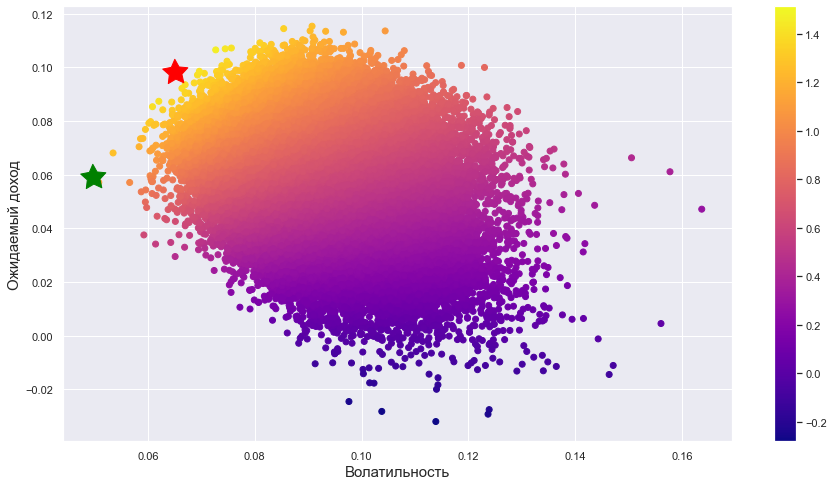

In [638]:

plt.figure(figsize=(15,8))
plt.scatter(result['Волатильность'],result['Ожидаемый доход'],c =result['Коэффициент Шарпа'],cmap='plasma')
plt.colorbar()

plt.scatter(max_sharpe_ratio[1],max_sharpe_ratio[0],marker = (5,1,3),color='red',s=700) #Red - Portfolio 1
plt.scatter(volatility_lowest[1],volatility_lowest[0],marker = (5,1,3),color='green',s=700)#Green - Portfolio 2
            

plt.xlabel('Волатильность',fontsize = 15)
plt.ylabel('Ожидаемый доход',fontsize = 15)
plt.show()

In [639]:
print('Максимальный коэффициент Шарпа:')
print('Все в процентах!!!')
print(round(max_sharpe_ratio * 100,2))

Максимальный коэффициент Шарпа:
Все в процентах!!!
Ожидаемый доход                                          9.84
Волатильность                                            6.50
Коэффициент Шарпа                                      151.34
Finland: OMX Helsinki 25                                 4.75
World: Bloomberg Coffee Euro Hedged TR                   1.37
Belgium: FTSE Belgium EUR                               10.56
New zealand: NZX All                                    28.64
Australia: S&P/ASX 200 Hotels Restaurants & Leisure     16.70
Brazil: BNY Mellon Brazil ADR TR                         0.32
Germany: BNY Mellon Germany ADR TR                       5.10
Australia: S&P/ASX Small Ordinaries Resources            2.51
Euro zone: TR Eurozone 2 Years Government Benchmark     13.59
United states: TR US 50                                 16.46
Name: 62870, dtype: float64


In [640]:
print('Минимальная волатильность:')
print('Все в процентах!!!')
print(round(volatility_lowest * 100,2))

Минимальная волатильность:
Все в процентах!!!
Ожидаемый доход                                          5.93
Волатильность                                            4.97
Коэффициент Шарпа                                      119.26
Finland: OMX Helsinki 25                                 8.79
World: Bloomberg Coffee Euro Hedged TR                   2.97
Belgium: FTSE Belgium EUR                                8.89
New zealand: NZX All                                    19.82
Australia: S&P/ASX 200 Hotels Restaurants & Leisure      8.22
Brazil: BNY Mellon Brazil ADR TR                         3.29
Germany: BNY Mellon Germany ADR TR                       4.07
Australia: S&P/ASX Small Ordinaries Resources            1.88
Euro zone: TR Eurozone 2 Years Government Benchmark     37.82
United states: TR US 50                                  4.24
Name: 2118, dtype: float64


In [706]:

concl=pd.DataFrame({'Монте Карло МинВол':volatility_lowest[3:],'Монте Карло МаксШарп':max_sharpe_ratio[3:]})
concl=concl.join(pd.DataFrame(hrp_weights))
concl.rename(columns={0: "HRP"},inplace=True)
concl=concl.join(herc_10_weights.T)
concl.rename(columns={0: "HCAA"},inplace=True)


In [707]:
concl

,Монте Карло МинВол,Монте Карло МаксШарп,HRP,HCAA
Finland: OMX Helsinki 25,0.087929,0.047497,0.000266,0.100000
World: Bloomberg Coffee Euro Hedged TR,0.029700,0.013685,0.000164,0.125000
Belgium: FTSE Belgium EUR,0.088934,0.105600,0.000270,0.100000
New zealand: NZX All,0.198169,0.286415,0.001876,0.083333
Australia: S&P/ASX 200 Hotels Restaurants & Leisure,0.082248,0.166954,0.000531,0.083333
Brazil: BNY Mellon Brazil ADR TR,0.032915,0.003183,0.000099,0.100000
Germany: BNY Mellon Germany ADR TR,0.040716,0.050975,0.000157,0.100000
Australia: S&P/ASX Small Ordinaries Resources,0.018753,0.025143,0.000318,0.083333
Euro zone: TR Eurozone 2 Years Government Benchmark,0.378209,0.135927,0.995983,0.125000
United states: TR US 50,0.042430,0.164620,0.000336,0.100000


Text(0, 0.5, 'Количество активов')

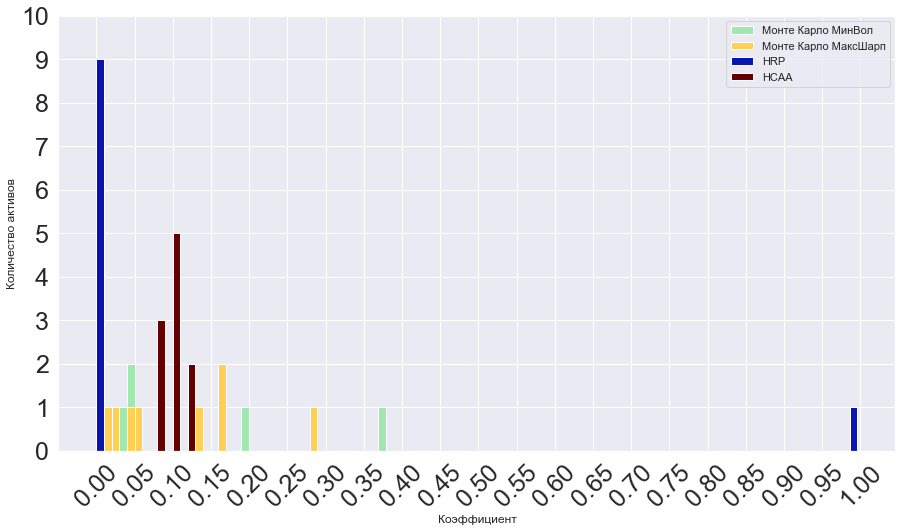

In [740]:
concl.plot(kind='hist',
        bins=100,
        rot=45,
        grid=True,
        figsize=(15,8),
        fontsize=25, 
        color=['#A0E8AF', '#FFCF56','#0a14af','#640000'])
plt.xticks(np.arange(0, 1.05, step=0.05))
plt.yticks(np.arange(0, 11, step=1))
plt.xlabel('Коэффициент')
plt.ylabel("Количество активов")

# Вывод 3
Метод Монте Карло для моделирования портфеля является простым и наглядным, однако, ожидаемую доходность очень сложно прогнозировать и для ее расчета мы используем простые модели, которые имеют слабую предсказательную способность. Преимуществом метода Монте Карло является независимость от обратимости матрицы ковариаций.
Методы кластеризации кажутся более релевантными в данном случае. Я бы опирался на них при выборе оптимального портфеля. При этом стоит четко определить, что для нас является приоритетным. Так как в части 2 было показано, что выбор разных метрик риска и связи может сильно поменять коэффициенты и тип портфеля.  

# Со мной можно связаться по телефону +79873951749